<a href="https://colab.research.google.com/github/lilyzhizhou/Datathon-5/blob/main/Datathon_5_Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load in data
data = pd.read_csv('/content/drive/MyDrive/Machine Learning /Datathon #5/mhealth.csv')

data.head()

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
0,2.1849,-9.6967,0.63077,0.103900,-0.84053,-0.68762,-8.6499,-4.5781,0.187760,-0.44902,-1.0103,0.034483,0,subject1
1,2.3876,-9.5080,0.68389,0.085343,-0.83865,-0.68369,-8.6275,-4.3198,0.023595,-0.44902,-1.0103,0.034483,0,subject1
2,2.4086,-9.5674,0.68113,0.085343,-0.83865,-0.68369,-8.5055,-4.2772,0.275720,-0.44902,-1.0103,0.034483,0,subject1
3,2.1814,-9.4301,0.55031,0.085343,-0.83865,-0.68369,-8.6279,-4.3163,0.367520,-0.45686,-1.0082,0.025862,0,subject1
4,2.4173,-9.3889,0.71098,0.085343,-0.83865,-0.68369,-8.7008,-4.1459,0.407290,-0.45686,-1.0082,0.025862,0,subject1


Checking for NA

---



In [5]:
missing_count = data.isna().sum()
total_count = len(data)
missing_percentage = (missing_count / total_count) * 100

missing_info = pd.DataFrame({'Missing Count': missing_count, 'Missing Percentage': missing_percentage.round(0)})
print(missing_info.sort_values(by='Missing Percentage', ascending=False))

          Missing Count  Missing Percentage
alx                   0                 0.0
aly                   0                 0.0
alz                   0                 0.0
glx                   0                 0.0
gly                   0                 0.0
glz                   0                 0.0
arx                   0                 0.0
ary                   0                 0.0
arz                   0                 0.0
grx                   0                 0.0
gry                   0                 0.0
grz                   0                 0.0
Activity              0                 0.0
subject               0                 0.0


we have no missing data

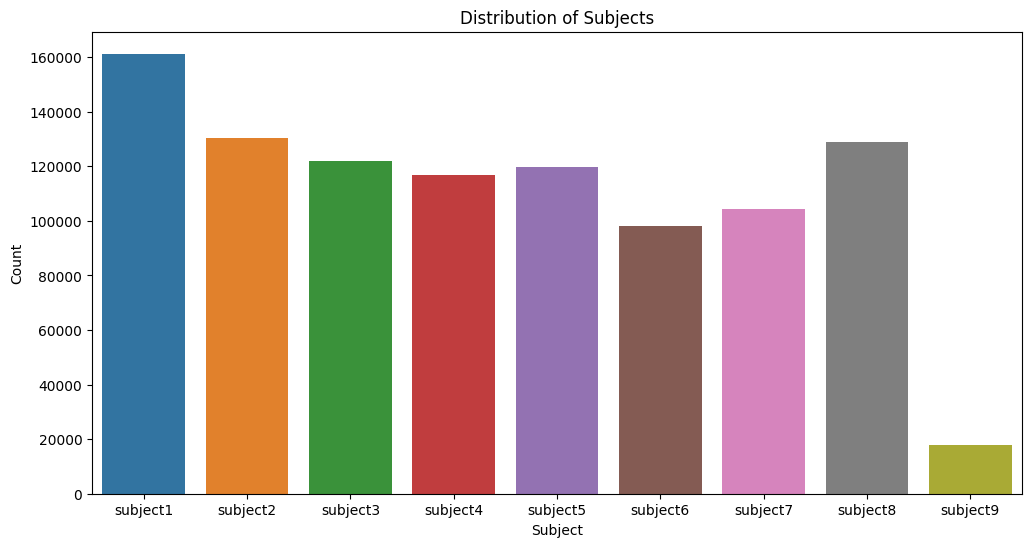

In [9]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='subject')
plt.title('Distribution of Subjects')
plt.xlabel('Subject')
plt.ylabel('Count')
plt.show()

- will need to consider removing subject 9
- Need to create a list where different subjects fall into training and testing set
- create a random assignment for allocating which subject falls into training and testing set
- then assign training set to list of training pts and assign testing set to list of testing pts

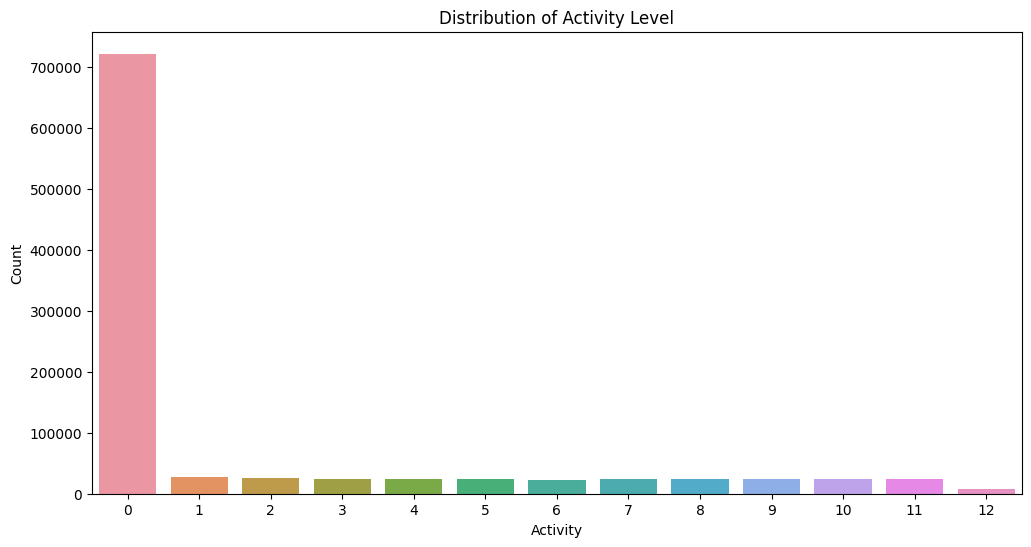

In [10]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Activity')
plt.title('Distribution of Activity Level')
plt.xlabel('Activity')
plt.ylabel('Count')
plt.show()

Correlation Matrix

---



In [12]:
target_column = 'Activity'
numerical_columns = ['alx',	'aly',	'alz'	,'glx',	'gly',	'glz',	'arx',	'ary',	'arz',	'grx',	'gry',	'grz']

<Axes: >

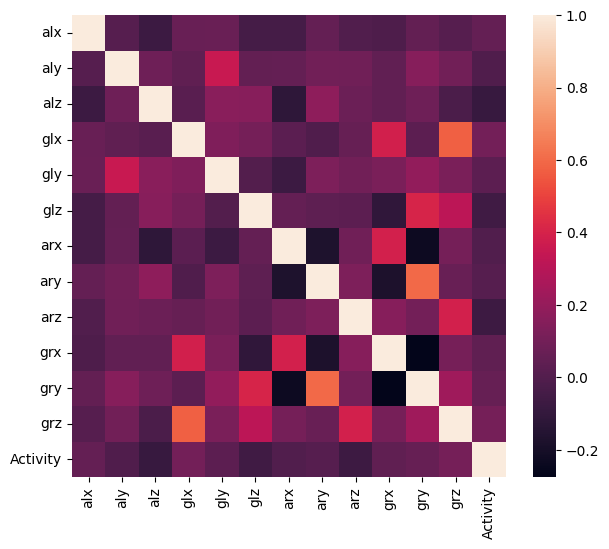

In [13]:
# correlation matrix
columns = numerical_columns + [target_column]

plt.figure(figsize=(7,6))
sns.heatmap(data[columns].corr())